In [3]:
import sys
sys.path.insert(1, '../../eispy2d/library/')
import analytical as ana
import mom_cg_fft as mom
import inputdata as ipt
import draw
import configuration as cfg
import result as rst

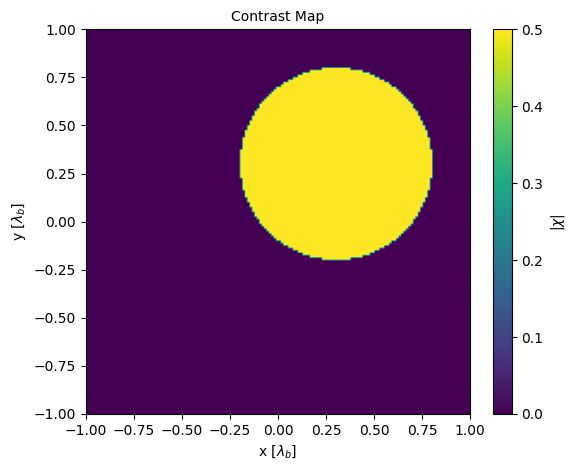

In [14]:
name = 'analytical'
NM = NS = 20
Ro = 4.
lambda_b = 1.
epsilon_rb = 1.
Lx = Ly = 2.
E0 = 1.
perfect_dielectric = True

config = cfg.Configuration(name=name + '.cfg', number_measurements=NM, 
                           number_sources=NS, observation_radius=Ro,
                           wavelength=lambda_b,
                           background_permittivity=epsilon_rb,
                           image_size=[Ly, Lx], magnitude=E0,
                           perfect_dielectric=perfect_dielectric)

epsilon_rd = 1.5
resolution = (160, 160)
noise = 0.
indicators = [rst.SHAPE_ERROR, rst.POSITION_ERROR]

test = ipt.InputData(name=name + '.ipt', configuration=config,
                     resolution=resolution, noise=noise, indicators=indicators)

chi = (epsilon_rd-epsilon_rb)/epsilon_rb
l = 0.5
position = [.3, .3]

test.rel_permittivity, _ = draw.circle(
    l, axis_length_x=Lx, axis_length_y=Ly, resolution=resolution,
    background_rel_permittivity=epsilon_rb, 
    object_rel_permittivity=epsilon_rd, center=position
)

test.draw(show=True)

In [23]:
forward = mom.MoM_CG_FFT(tolerance=1e-4, maximum_iterations=5000,
                         parallelization=True)
_ = forward.solve(test)

In [16]:
foan = ana.Analytical(contrast=chi, radius=l, position=position)
test_ana = ipt.InputData(name=name + '_ana.ipt', configuration=config,
                            resolution=resolution, noise=noise, indicators=indicators)
foan.dielectric_cylinder(test_ana, SAVE_MAP=True)

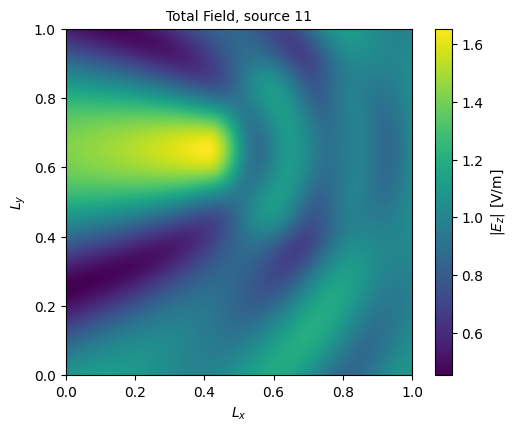

In [20]:
test.plot_total_field(source=10, show=True)

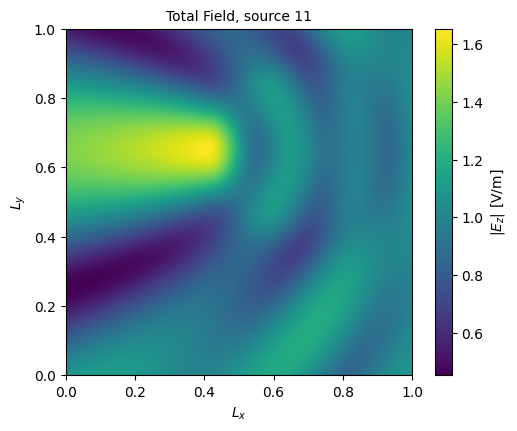

In [19]:
test_ana.plot_total_field(source=10, show=True)

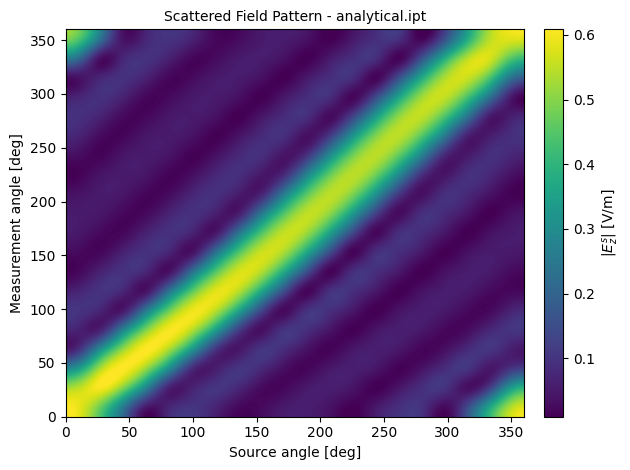

In [24]:
test.plot_scattered_field(show=True)

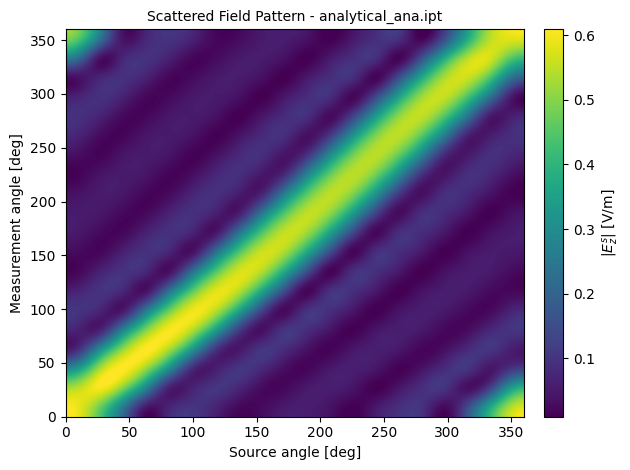

In [22]:
test_ana.plot_scattered_field(show=True)

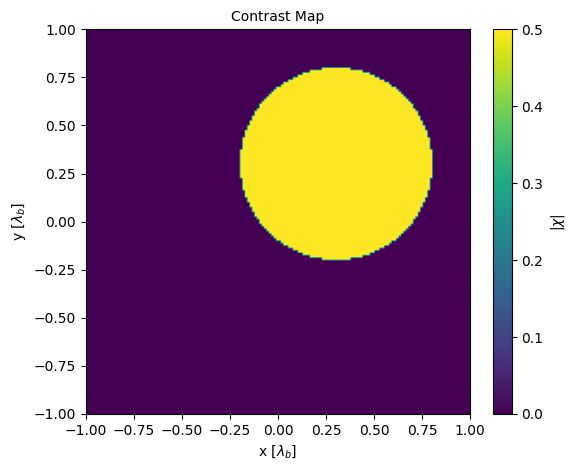

In [25]:
test_ana.draw(show=True)